In [1]:
!pip install d2l==0.17.2

In [2]:
# Import Library
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [3]:
# Generating the Dataset
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.45060775 -1.388415  ], shape=(2,), dtype=float32) 
label: tf.Tensor([8.003502], shape=(1,), dtype=float32)


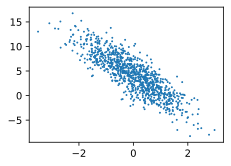

In [5]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [6]:
#Reading the Dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-1.9259839  -0.77711874]
 [ 2.0024228   0.23602091]
 [-0.7038308  -0.32786906]
 [-0.41174674 -2.3300176 ]
 [ 0.9863858  -1.5489013 ]
 [ 0.17362066  0.92882216]
 [-0.51303476 -1.1822929 ]
 [-0.19863953 -0.13554786]
 [-1.0580827  -0.68435514]
 [-0.9059111  -1.1739255 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 2.9850292]
 [ 7.421708 ]
 [ 3.9058974]
 [11.299707 ]
 [11.439593 ]
 [ 1.3787534]
 [ 7.194526 ]
 [ 4.257291 ]
 [ 4.4096184]
 [ 6.3671427]], shape=(10, 1), dtype=float32)


In [8]:
# Initializing Model Parameters
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [9]:
# Defining the Model
def linreg(X, w, b): 
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [10]:
# Defining the Loss Function
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [11]:
# Defining the Optimization Algorithm
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [12]:
# Training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.031366
epoch 2, loss 0.000106
epoch 3, loss 0.000049


In [13]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00020301 -0.00043344]
error in estimating b: [8.1539154e-05]
